In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [3]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)

In [4]:
train_df = pd.read_json('/Users/Home/Desktop/CMPT 459/MI2/final_train_df.json')

In [5]:
test_df = pd.read_json('/Users/Home/Desktop/CMPT 459/MI2/final_test.json')

In [10]:
old_train_df = pd.read_json('/Users/Home/Desktop/CMPT 459/MI2/train.json')

In [11]:
old_test_df = pd.read_json('/Users/Home/Desktop/CMPT 459/MI2/test.json')

In [23]:
# display(test_df.shape)
# display(old_test_df.shape)
old_train_df = old_train_df.reset_index(drop=True)
old_test_df = old_test_df.reset_index(drop=True)

In [24]:
train_df['created'] = old_train_df['created']
display(train_df.shape)

(48329, 38)

In [25]:
test_df['created'] = old_test_df['created']
display(test_df.shape)

(74659, 36)

In [26]:
train_df['created_dt'] = pd.to_datetime(train_df['created'])
test_df['created_dt'] = pd.to_datetime(test_df['created'])

In [54]:
unique, counts = np.unique(train_df.manager_id, return_counts=True)

manager_id_arr = np.asarray((unique, counts)).T
len(manager_id_arr)

3423

In [55]:
unique, counts = np.unique(train_df.building_id, return_counts=True)

building_id_arr = np.asarray((unique, counts)).T
len(building_id_arr)

7219

In [57]:
unique, counts = np.unique(test_df.manager_id, return_counts=True)

test_manager_id_arr = np.asarray((unique, counts)).T
len(test_manager_id_arr)

3851

In [58]:
unique, counts = np.unique(test_df.building_id, return_counts=True)

test_building_id_arr = np.asarray((unique, counts)).T
len(test_building_id_arr)

9321

In [59]:
manager_id_dict = {}
for val in manager_id_arr:
    manager_id_dict[val[0]] = val[1]

In [60]:
building_id_dict = {}
for val in building_id_arr:
    building_id_dict[val[0]] = val[1]

In [61]:
test_manager_id_dict = {}
for val in test_manager_id_arr:
    test_manager_id_dict[val[0]] = val[1]

In [62]:
test_building_id_dict = {}
for val in test_building_id_arr:
    test_building_id_dict[val[0]] = val[1]

In [63]:
def add_count(row, id_dict):
    if row in id_dict:
        return id_dict[row]

In [64]:
train_df['managerID_count'] = train_df['manager_id'].apply(lambda row: add_count(row, manager_id_dict))

In [66]:
train_df['buildingID_count'] = train_df['building_id'].apply(lambda row: add_count(row, building_id_dict))

In [67]:
test_df['managerID_count'] = test_df['manager_id'].apply(lambda row: add_count(row, test_manager_id_dict))

In [68]:
test_df['buildingID_count'] = test_df['building_id'].apply(lambda row: add_count(row, test_building_id_dict))

In [71]:
train_df['weekends'] = (train_df['created_dt'].dt.weekday > 3).astype(float)

In [72]:
test_df['weekends'] = (test_df['created_dt'].dt.weekday > 3).astype(float)

In [74]:
train_df['month_4'] = (train_df['created_dt'].dt.month == 4).astype(float)
train_df['month_5'] = (train_df['created_dt'].dt.month == 5).astype(float)

In [75]:
test_df['month_4'] = (test_df['created_dt'].dt.month == 4).astype(float)
test_df['month_5'] = (test_df['created_dt'].dt.month == 5).astype(float)

In [76]:
# 0-5, 6-11, 12-17,
# train_df['created_dt'].dt.hour
train_df['created_nights'] = (train_df['created_dt'].dt.hour < 6).astype(float)
train_df['created_morning'] = ((train_df['created_dt'].dt.hour >= 6) & (train_df['created_dt'].dt.hour < 12)).astype(float)
train_df['created_afternoon'] = ((train_df['created_dt'].dt.hour >= 12) & (train_df['created_dt'].dt.hour < 18)).astype(float)


In [77]:
test_df['created_nights'] = (test_df['created_dt'].dt.hour < 6).astype(float)
test_df['created_morning'] = ((test_df['created_dt'].dt.hour >= 6) & (test_df['created_dt'].dt.hour < 12)).astype(float)
test_df['created_afternoon'] = ((test_df['created_dt'].dt.hour >= 12) & (test_df['created_dt'].dt.hour < 18)).astype(float)

In [80]:
from sklearn.metrics.pairwise import manhattan_distances
downtown = [40.7209, -74.0007]

def man_distances(row):
    dist = manhattan_distances([[row.latitude, row.longitude]], [downtown])
    return dist[0][0]


train_df['dt_distance'] = train_df.apply(lambda row: man_distances(row), axis=1)
train_df.dt_distance.head()

0    0.0569
1    0.0589
2    0.0748
3    0.0646
4    0.0494
Name: dt_distance, dtype: float64

In [83]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48329 entries, 0 to 48328
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   bathrooms          48329 non-null  float64       
 1   bedrooms           48329 non-null  int64         
 2   building_id        48329 non-null  object        
 3   created            48329 non-null  object        
 4   description        48329 non-null  object        
 5   display_address    48329 non-null  object        
 6   features           48329 non-null  object        
 7   latitude           48329 non-null  float64       
 8   listing_id         48329 non-null  int64         
 9   longitude          48329 non-null  float64       
 10  manager_id         48329 non-null  object        
 11  photos             48329 non-null  object        
 12  price              48329 non-null  int64         
 13  street_address     48329 non-null  object        
 14  intere

In [82]:
test_df.shape

(74659, 44)

# Manager skill

In [84]:
temp = pd.concat([train_df.manager_id,pd.get_dummies(train_df.interest_level)], axis = 1).groupby('manager_id').mean()
temp.columns = ['high_frac','low_frac', 'medium_frac']
temp['count'] = train_df.groupby('manager_id').count().iloc[:,1]

In [88]:
temp['manager_skill'] = temp['high_frac']*2 + temp['medium_frac']
# temp

In [89]:
unranked_managers_ixes = temp['count']<20
# ... and ranked ones
ranked_managers_ixes = ~unranked_managers_ixes

In [90]:
mean_values = temp.loc[ranked_managers_ixes, ['high_frac','low_frac', 'medium_frac','manager_skill']].mean()
# print(mean_values)
temp.loc[unranked_managers_ixes,['high_frac','low_frac', 'medium_frac','manager_skill']] = mean_values.values
# print(temp.tail(10))

In [91]:
new_train_df = train_df.merge(temp.reset_index(),how='left', left_on='manager_id', right_on='manager_id')

In [92]:
new_manager_ixes = new_train_df['high_frac'].isnull()
new_train_df.loc[new_manager_ixes,['high_frac','low_frac', 'medium_frac','manager_skill']] = mean_values.values

# Building interest

In [94]:
bi_temp = pd.concat([new_train_df.building_id, pd.get_dummies(train_df.interest_level)], axis = 1).groupby('building_id').mean()
bi_temp.columns = ['high_frac_b','low_frac_b', 'medium_frac_b']
bi_temp['bi_count'] = new_train_df.groupby('building_id').count().iloc[:,1]

In [95]:
bi_temp['building_interest'] = bi_temp['high_frac_b']*3 + bi_temp['medium_frac_b'] - 0.10*bi_temp['low_frac_b']

In [96]:
unranked_building_ixes = bi_temp['bi_count']<10
# ... and ranked ones
ranked_building_ixes = ~unranked_building_ixes

In [97]:
bi_mean_values = bi_temp.loc[ranked_building_ixes, ['high_frac_b','low_frac_b', 'medium_frac_b','building_interest']].mean()

bi_temp.loc[unranked_building_ixes,['high_frac_b','low_frac_b', 'medium_frac_b','building_interest']] = mean_values.values
bi_temp.tail(2)

,high_frac_b,low_frac_b,medium_frac_b,bi_count,building_interest
building_id,,,,,
ffe55387cd931c117ee1b8446f21953b,0.076139,0.679429,0.244432,1,0.39671
fff5915444b98b72a44a9456901f083c,0.076139,0.679429,0.244432,2,0.39671


In [98]:
new_train_df = new_train_df.merge(bi_temp.reset_index(),how='left', left_on='building_id', right_on='building_id')
new_train_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,dt_distance,pet_policy,listing_type,unit_features,building_features,apartment,appliance,bathroom,bedroom,building,contact,floor,high,kitchen,room,mall_distance,created_hour,created_month,created_day,num_photos,description_len,created_dt,managerID_count,buildingID_count,weekends,month_4,month_5,created_nights,created_morning,created_afternoon,high_frac,low_frac,medium_frac,count,manager_skill,high_frac_b,low_frac_b,medium_frac_b,bi_count,building_interest
0,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium,0.0569,2,0,1,0,0.000000,0.000000,0.274259,0.108624,0.000000,0.146412,0.110607,0.000000,0.098530,0.000000,0.04995,5,6,16,12,77,2016-06-16 05:55:27,107,5,0.0,0.0,0.0,1.0,0.0,0.0,0.046729,0.542056,0.411215,107,0.504673,0.076139,0.679429,0.244432,5,0.396710
1,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low,0.0589,0,0,1,2,0.144399,0.000000,0.000000,0.000000,0.000000,0.106104,0.000000,0.109239,0.000000,0.000000,0.01463,5,6,1,6,131,2016-06-01 05:44:33,26,51,0.0,0.0,0.0,1.0,0.0,0.0,0.038462,0.346154,0.615385,26,0.692308,0.058824,0.529412,0.411765,51,0.535294
2,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium,0.0748,0,0,1,2,0.323540,0.080271,0.089065,0.070551,0.070761,0.000000,0.000000,0.000000,0.063995,0.086122,0.01813,15,6,14,6,119,2016-06-14 15:19:59,93,71,0.0,0.0,0.0,0.0,0.0,1.0,0.032258,0.763441,0.204301,93,0.268817,0.028169,0.619718,0.352113,71,0.374648
3,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium,0.0646,0,0,0,0,0.154491,0.095824,0.106322,0.084221,0.000000,0.000000,0.085758,0.000000,0.076394,0.205618,0.06505,7,6,24,5,95,2016-06-24 07:54:24,90,3,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.744444,0.255556,90,0.255556,0.076139,0.679429,0.244432,3,0.396710
4,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low,0.0494,0,0,0,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01993,3,6,28,4,41,2016-06-28 03:50:23,55,86,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.854545,0.145455,55,0.145455,0.034884,0.779070,0.186047,86,0.212791


In [101]:
test_df = test_df.merge(temp.reset_index(),how='left', left_on='manager_id', right_on='manager_id')
test_df = test_df.merge(bi_temp.reset_index(),how='left', left_on='building_id', right_on='building_id')
test_new_manager_ixes = test_df['manager_skill'].isnull()
test_new_building_ixes = test_df['building_interest'].isnull()

test_df.loc[test_new_manager_ixes,['high_frac','low_frac', 'medium_frac','manager_skill']] = mean_values.values
test_df.loc[test_new_building_ixes,['high_frac_b','low_frac_b', 'medium_frac_b','building_interest']] = mean_values.values

# df_test.isnull().sum()

In [156]:
v2_selected_feats = ["bathrooms", "bedrooms", "latitude", "longitude", "price", "pet_policy", "listing_type", 
                     "unit_features", "building_features", "apartment", "appliance", "bathroom", "bedroom",
                     "building", "contact", "floor", "high", "kitchen", "room", "num_photos", 
                     "description_len", "mall_distance", "dt_distance", "managerID_count", "buildingID_count", 
                    "weekends", "month_4", "month_5", "created_nights","created_morning", "created_afternoon", 
                     "manager_skill", "building_interest", "density"]

In [157]:
target_num_map = {'high':0, 'medium':1, 'low':2}
new_train_df['int_level'] = np.array(train_df['interest_level'].apply(lambda x: target_num_map[x]))

In [116]:
new_train_df.to_json('/Users/Home/Desktop/CMPT 459/MI2/final_train_df_m3_v2.json')

In [118]:
# test_df.to_json('/Users/Home/Desktop/CMPT 459/MI2/final_test_df_m3_v2.json')
test_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,pet_policy,listing_type,unit_features,building_features,created_month,created_day,num_photos,description_len,created_hour,mall_distance,dt_distance,apartment,appliance,bathroom,bedroom,building,contact,floor,high,kitchen,room,created_dt,managerID_count,buildingID_count,weekends,month_4,month_5,created_nights,created_morning,created_afternoon,high_frac,low_frac,medium_frac,count,manager_skill,high_frac_b,low_frac_b,medium_frac_b,bi_count,building_interest
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street,0,0,1,1,6,11,8,78,5,0.030923,0.0166,0.000000,0.000000,0.00000,0.163706,0.000000,0.000000,0.000000,0.000000,0.000000,0.100376,2016-06-11 05:29:41,38,5,1.0,0.0,0.0,1.0,0.0,0.0,0.208333,0.458333,0.333333,24.0,0.750000,0.076139,0.679429,0.244432,3.0,0.396710
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street,2,0,0,0,6,24,3,35,6,0.020930,0.0076,0.000000,0.148697,0.00000,0.000000,0.000000,0.000000,0.132658,0.000000,0.000000,0.000000,2016-06-24 06:36:34,17,12378,1.0,0.0,0.0,0.0,1.0,0.0,0.076139,0.679429,0.244432,9.0,0.396710,0.022209,0.916933,0.060859,8150.0,0.035791
2,1.0,0,0,2016-06-17 01:23:39,Spacious studio in Prime Location. Cleanbuildi...,Sullivan Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7260,7174566,-74.0026,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7174566_ba3a35c5...,2295,115 Sullivan Street,2,0,0,0,6,17,1,39,1,0.020130,0.0070,0.000000,0.000000,0.16054,0.000000,0.000000,0.171625,0.128922,0.000000,0.114486,0.000000,2016-06-17 01:23:39,3854,12378,1.0,0.0,0.0,1.0,0.0,0.0,0.064346,0.693242,0.242412,2471.0,0.371105,0.022209,0.916933,0.060859,8150.0,0.035791
3,1.0,2,f9c826104b91d868e69bd25746448c0c,2016-06-21 05:06:02,For immediate access call Bryan.<br /><br />Bo...,Jones Street,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7321,7191391,-74.0028,41735645e0f8f13993c42894023f8e58,[https://photos.renthop.com/2/7191391_8c2f2d49...,2900,23 Jones Street,2,0,0,0,6,21,4,22,5,0.013830,0.0133,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016-06-21 05:06:02,176,10,0.0,0.0,0.0,1.0,0.0,0.0,0.053846,0.661538,0.284615,130.0,0.392308,0.076139,0.679429,0.244432,4.0,0.396710
4,1.0,1,81062936e12ee5fa6cd2b965698e17d5,2016-06-16 07:24:27,Beautiful TRUE 1 bedroom in a luxury building ...,Exchange Place,"[Roof Deck, Doorman, Elevator, Fitness Center,...",40.7054,7171695,-74.0095,a742cf7dd3b2627d83417bc3a1b3ec96,[https://photos.renthop.com/2/7171695_089ffee2...,3254,20 Exchange Place,2,0,0,3,6,16,6,85,7,0.008120,0.0243,0.086111,0.108043,0.00000,0.094273,0.095006,0.000000,0.096389,0.131148,0.085595,0.000000,2016-06-16 07:24:27,35,94,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.560000,0.440000,25.0,0.440000,0.064935,0.675325,0.259740,77.0,0.387013


In [112]:
import xgboost as xgb
from sklearn.model_selection import KFold

In [292]:
X = new_train_df[v2_selected_feats].values
y = new_train_df["int_level"]

In [293]:
param = {
    'objective': 'multi:softprob',  
    'eta': 0.3, #learning rate, default is 0.3
    'max_depth': 3,  #default is 6, increase this value = more complex model
    'num_class': 3,
    'eval_metric': 'mlogloss',
    'min_child_weight': 1, # default is 1, larger value = more conservative model
    'subsample': 1, # default is 1, smaller == less overfitting
    'colsample_bytree': 1, # default is 1
    'seed': 42
    }

param0 = {
    'objective': 'multi:softprob',  
    'eta': 0.1, 
    'max_depth': 3,  #default is 6, increase this value = more complex model
    'num_class': 3,
    'eval_metric': 'mlogloss',
    'min_child_weight': 1, # default is 1, larger value = more conservative model
    'subsample': 0.6, # default is 1, smaller == less overfitting
    'colsample_bytree': 0.6, # default is 1
    'seed': 42
    }

param1 = {
    'objective': 'multi:softprob',  
    'eta': 0.1, 
    'max_depth': 4,  #default is 6, increase this value = more complex model
    'num_class': 3,
    'eval_metric': 'mlogloss',
    'min_child_weight': 1, # default is 1, larger value = more conservative model
    'subsample': 0.7, # default is 1, smaller == less overfitting
    'colsample_bytree': 0.7, # default is 1
    'seed': 42
    }

param2 = {
    'objective': 'multi:softprob',  
    'eta': 0.1, 
    'max_depth': 5,  #default is 6, increase this value = more complex model
    'num_class': 3,
    'eval_metric': 'mlogloss',
    'min_child_weight': 1, # default is 1, larger value = more conservative model
    'subsample': 0.8, # default is 1, smaller == less overfitting
    'colsample_bytree': 0.8, # default is 1
    'seed': 42
    }

param3 = {
    'objective': 'multi:softprob',  
    'eta': 0.1, 
    'max_depth': 6,  #default is 6, increase this value = more complex model
    'num_class': 3,
    'eval_metric': 'mlogloss',
    'min_child_weight': 1, # default is 1, larger value = more conservative model
    'subsample': 0.9, # default is 1, smaller == less overfitting
    'colsample_bytree': 0.9, # default is 1
    'seed': 42
    }

param4 = {
    'objective': 'multi:softprob',  
    'eta': 0.1, #
    'max_depth': 7,  #default is 6, increase this value = more complex model
    'num_class': 3,
    'eval_metric': 'mlogloss',
    'min_child_weight': 1, # default is 1, larger value = more conservative model
    'subsample': 1, # default is 1, smaller == less overfitting
    'colsample_bytree': 1, # default is 1
    'seed': 42
    }

In [294]:
param_list = [dict() for x in range(5)]
param_list[0] = param0
param_list[1] = param1
param_list[2] = param2
param_list[3] = param3
param_list[4] = param4
# param_list[1]

In [272]:
# new_train_df[v2_selected_feats].info()
from sklearn.metrics import f1_score

In [295]:
# test_scores = []
train_scores = []
# log_scores = []
valid_score = []

steps = 500
i = 0

c = KFold(n_splits=5, random_state=42, shuffle=True)

for train_index, test_index in c.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_test, label=y_test)

    watchlist = [ (dtrain,'train'), (dvalid, 'test(val)') ]
    model = xgb.train(param_list[i], dtrain, steps, watchlist, early_stopping_rounds=20)
    i += 1

    y_pred = model.predict(dvalid)
    
    t = dvalid.get_label()
    p = np.argmax(y_pred, axis = 1)

    
    y_train_pred = model.predict(dtrain)
    train_t = dtrain.get_label()
    train_p = np.argmax(y_train_pred, axis = 1)
    
    train_scores.append(accuracy_score(train_t, train_p))
    valid_score.append(accuracy_score(t, p))
    
    
#     test_scores.append(model.score(X_test, y_test))
#     train_scores.append(clf.score(X_train, y_train))
#     y_test_pred = clf.predict_proba(X_test)
#     log_scores.append(log_loss(y_test, y_test_pred)) 494 == best

[0]	train-mlogloss:1.0402	test(val)-mlogloss:1.04033
Multiple eval metrics have been passed: 'test(val)-mlogloss' will be used for early stopping.

Will train until test(val)-mlogloss hasn't improved in 20 rounds.
[1]	train-mlogloss:0.990078	test(val)-mlogloss:0.990117
[2]	train-mlogloss:0.949697	test(val)-mlogloss:0.949598
[3]	train-mlogloss:0.911503	test(val)-mlogloss:0.911524
[4]	train-mlogloss:0.879085	test(val)-mlogloss:0.879086
[5]	train-mlogloss:0.850594	test(val)-mlogloss:0.850685
[6]	train-mlogloss:0.826551	test(val)-mlogloss:0.826512
[7]	train-mlogloss:0.80302	test(val)-mlogloss:0.803206
[8]	train-mlogloss:0.78298	test(val)-mlogloss:0.783412
[9]	train-mlogloss:0.766513	test(val)-mlogloss:0.766823
[10]	train-mlogloss:0.750249	test(val)-mlogloss:0.750692
[11]	train-mlogloss:0.737138	test(val)-mlogloss:0.737697
[12]	train-mlogloss:0.724796	test(val)-mlogloss:0.725284
[13]	train-mlogloss:0.714172	test(val)-mlogloss:0.714546
[14]	train-mlogloss:0.704408	test(val)-mlogloss:0.704755

[141]	train-mlogloss:0.554665	test(val)-mlogloss:0.565081
[142]	train-mlogloss:0.554332	test(val)-mlogloss:0.564797
[143]	train-mlogloss:0.554071	test(val)-mlogloss:0.564667
[144]	train-mlogloss:0.553783	test(val)-mlogloss:0.564437
[145]	train-mlogloss:0.553529	test(val)-mlogloss:0.564307
[146]	train-mlogloss:0.553317	test(val)-mlogloss:0.564235
[147]	train-mlogloss:0.553037	test(val)-mlogloss:0.564053
[148]	train-mlogloss:0.552723	test(val)-mlogloss:0.563822
[149]	train-mlogloss:0.552408	test(val)-mlogloss:0.563631
[150]	train-mlogloss:0.552168	test(val)-mlogloss:0.563453
[151]	train-mlogloss:0.551908	test(val)-mlogloss:0.563319
[152]	train-mlogloss:0.551653	test(val)-mlogloss:0.563182
[153]	train-mlogloss:0.551377	test(val)-mlogloss:0.563049
[154]	train-mlogloss:0.551159	test(val)-mlogloss:0.562945
[155]	train-mlogloss:0.55091	test(val)-mlogloss:0.562781
[156]	train-mlogloss:0.550762	test(val)-mlogloss:0.562735
[157]	train-mlogloss:0.550544	test(val)-mlogloss:0.562599
[158]	train-mlo

[283]	train-mlogloss:0.526463	test(val)-mlogloss:0.549588
[284]	train-mlogloss:0.526304	test(val)-mlogloss:0.549503
[285]	train-mlogloss:0.526119	test(val)-mlogloss:0.549489
[286]	train-mlogloss:0.525969	test(val)-mlogloss:0.54938
[287]	train-mlogloss:0.525797	test(val)-mlogloss:0.549275
[288]	train-mlogloss:0.525638	test(val)-mlogloss:0.549255
[289]	train-mlogloss:0.525492	test(val)-mlogloss:0.5493
[290]	train-mlogloss:0.525369	test(val)-mlogloss:0.54921
[291]	train-mlogloss:0.525201	test(val)-mlogloss:0.549203
[292]	train-mlogloss:0.525043	test(val)-mlogloss:0.549216
[293]	train-mlogloss:0.524894	test(val)-mlogloss:0.549148
[294]	train-mlogloss:0.52476	test(val)-mlogloss:0.549154
[295]	train-mlogloss:0.5246	test(val)-mlogloss:0.549098
[296]	train-mlogloss:0.524444	test(val)-mlogloss:0.549112
[297]	train-mlogloss:0.524246	test(val)-mlogloss:0.548993
[298]	train-mlogloss:0.524044	test(val)-mlogloss:0.548858
[299]	train-mlogloss:0.523861	test(val)-mlogloss:0.548736
[300]	train-mlogloss:

[425]	train-mlogloss:0.506994	test(val)-mlogloss:0.544446
[426]	train-mlogloss:0.506889	test(val)-mlogloss:0.54447
[427]	train-mlogloss:0.506751	test(val)-mlogloss:0.544428
[428]	train-mlogloss:0.506646	test(val)-mlogloss:0.544339
[429]	train-mlogloss:0.506515	test(val)-mlogloss:0.544288
[430]	train-mlogloss:0.506382	test(val)-mlogloss:0.544192
[431]	train-mlogloss:0.506261	test(val)-mlogloss:0.54415
[432]	train-mlogloss:0.506168	test(val)-mlogloss:0.54413
[433]	train-mlogloss:0.506002	test(val)-mlogloss:0.544041
[434]	train-mlogloss:0.505898	test(val)-mlogloss:0.544034
[435]	train-mlogloss:0.505768	test(val)-mlogloss:0.543985
[436]	train-mlogloss:0.505616	test(val)-mlogloss:0.543874
[437]	train-mlogloss:0.505459	test(val)-mlogloss:0.54388
[438]	train-mlogloss:0.50534	test(val)-mlogloss:0.543873
[439]	train-mlogloss:0.505187	test(val)-mlogloss:0.543876
[440]	train-mlogloss:0.505059	test(val)-mlogloss:0.543788
[441]	train-mlogloss:0.50493	test(val)-mlogloss:0.543701
[442]	train-mlogloss

[66]	train-mlogloss:0.563782	test(val)-mlogloss:0.578151
[67]	train-mlogloss:0.563005	test(val)-mlogloss:0.577623
[68]	train-mlogloss:0.562431	test(val)-mlogloss:0.577294
[69]	train-mlogloss:0.56183	test(val)-mlogloss:0.57694
[70]	train-mlogloss:0.561167	test(val)-mlogloss:0.576613
[71]	train-mlogloss:0.560333	test(val)-mlogloss:0.575994
[72]	train-mlogloss:0.55967	test(val)-mlogloss:0.575507
[73]	train-mlogloss:0.558636	test(val)-mlogloss:0.574713
[74]	train-mlogloss:0.558059	test(val)-mlogloss:0.574488
[75]	train-mlogloss:0.557456	test(val)-mlogloss:0.574158
[76]	train-mlogloss:0.556956	test(val)-mlogloss:0.573904
[77]	train-mlogloss:0.556188	test(val)-mlogloss:0.573452
[78]	train-mlogloss:0.555642	test(val)-mlogloss:0.573182
[79]	train-mlogloss:0.554826	test(val)-mlogloss:0.572799
[80]	train-mlogloss:0.554228	test(val)-mlogloss:0.572412
[81]	train-mlogloss:0.553566	test(val)-mlogloss:0.571962
[82]	train-mlogloss:0.553155	test(val)-mlogloss:0.571804
[83]	train-mlogloss:0.552619	test(

[209]	train-mlogloss:0.502359	test(val)-mlogloss:0.552707
[210]	train-mlogloss:0.502103	test(val)-mlogloss:0.552727
[211]	train-mlogloss:0.501747	test(val)-mlogloss:0.552621
[212]	train-mlogloss:0.501557	test(val)-mlogloss:0.552542
[213]	train-mlogloss:0.501292	test(val)-mlogloss:0.552448
[214]	train-mlogloss:0.500996	test(val)-mlogloss:0.552399
[215]	train-mlogloss:0.500655	test(val)-mlogloss:0.55235
[216]	train-mlogloss:0.50035	test(val)-mlogloss:0.552281
[217]	train-mlogloss:0.500128	test(val)-mlogloss:0.552182
[218]	train-mlogloss:0.499848	test(val)-mlogloss:0.552195
[219]	train-mlogloss:0.499507	test(val)-mlogloss:0.552013
[220]	train-mlogloss:0.499146	test(val)-mlogloss:0.551855
[221]	train-mlogloss:0.498876	test(val)-mlogloss:0.551789
[222]	train-mlogloss:0.498616	test(val)-mlogloss:0.551823
[223]	train-mlogloss:0.498379	test(val)-mlogloss:0.551812
[224]	train-mlogloss:0.498021	test(val)-mlogloss:0.551676
[225]	train-mlogloss:0.497766	test(val)-mlogloss:0.551663
[226]	train-mlog

[351]	train-mlogloss:0.467402	test(val)-mlogloss:0.547535
[352]	train-mlogloss:0.467216	test(val)-mlogloss:0.547517
[353]	train-mlogloss:0.466971	test(val)-mlogloss:0.54749
[354]	train-mlogloss:0.46678	test(val)-mlogloss:0.547536
[355]	train-mlogloss:0.466584	test(val)-mlogloss:0.547528
[356]	train-mlogloss:0.466357	test(val)-mlogloss:0.547564
[357]	train-mlogloss:0.466136	test(val)-mlogloss:0.547546
[358]	train-mlogloss:0.465902	test(val)-mlogloss:0.547519
[359]	train-mlogloss:0.465695	test(val)-mlogloss:0.547602
[360]	train-mlogloss:0.465458	test(val)-mlogloss:0.547524
[361]	train-mlogloss:0.465244	test(val)-mlogloss:0.547551
[362]	train-mlogloss:0.465116	test(val)-mlogloss:0.547539
[363]	train-mlogloss:0.464918	test(val)-mlogloss:0.547558
[364]	train-mlogloss:0.464737	test(val)-mlogloss:0.547489
[365]	train-mlogloss:0.464536	test(val)-mlogloss:0.547516
[366]	train-mlogloss:0.464348	test(val)-mlogloss:0.547485
[367]	train-mlogloss:0.464149	test(val)-mlogloss:0.547409
[368]	train-mlog

[27]	train-mlogloss:0.599176	test(val)-mlogloss:0.615045
[28]	train-mlogloss:0.595997	test(val)-mlogloss:0.612256
[29]	train-mlogloss:0.593295	test(val)-mlogloss:0.609913
[30]	train-mlogloss:0.590647	test(val)-mlogloss:0.607835
[31]	train-mlogloss:0.588218	test(val)-mlogloss:0.605954
[32]	train-mlogloss:0.585449	test(val)-mlogloss:0.603596
[33]	train-mlogloss:0.582789	test(val)-mlogloss:0.601377
[34]	train-mlogloss:0.580666	test(val)-mlogloss:0.599629
[35]	train-mlogloss:0.578357	test(val)-mlogloss:0.597756
[36]	train-mlogloss:0.576602	test(val)-mlogloss:0.596276
[37]	train-mlogloss:0.574865	test(val)-mlogloss:0.59485
[38]	train-mlogloss:0.573352	test(val)-mlogloss:0.593759
[39]	train-mlogloss:0.57155	test(val)-mlogloss:0.592332
[40]	train-mlogloss:0.569744	test(val)-mlogloss:0.590902
[41]	train-mlogloss:0.568291	test(val)-mlogloss:0.589832
[42]	train-mlogloss:0.566789	test(val)-mlogloss:0.588606
[43]	train-mlogloss:0.565154	test(val)-mlogloss:0.587264
[44]	train-mlogloss:0.563775	test

[171]	train-mlogloss:0.476286	test(val)-mlogloss:0.550589
[172]	train-mlogloss:0.47568	test(val)-mlogloss:0.550537
[173]	train-mlogloss:0.475132	test(val)-mlogloss:0.550523
[174]	train-mlogloss:0.47486	test(val)-mlogloss:0.550447
[175]	train-mlogloss:0.474421	test(val)-mlogloss:0.550423
[176]	train-mlogloss:0.473989	test(val)-mlogloss:0.550368
[177]	train-mlogloss:0.473495	test(val)-mlogloss:0.550333
[178]	train-mlogloss:0.472978	test(val)-mlogloss:0.550233
[179]	train-mlogloss:0.472483	test(val)-mlogloss:0.550169
[180]	train-mlogloss:0.47221	test(val)-mlogloss:0.550066
[181]	train-mlogloss:0.471793	test(val)-mlogloss:0.549928
[182]	train-mlogloss:0.471278	test(val)-mlogloss:0.54985
[183]	train-mlogloss:0.470923	test(val)-mlogloss:0.549758
[184]	train-mlogloss:0.470473	test(val)-mlogloss:0.549686
[185]	train-mlogloss:0.469994	test(val)-mlogloss:0.549688
[186]	train-mlogloss:0.469435	test(val)-mlogloss:0.549633
[187]	train-mlogloss:0.468913	test(val)-mlogloss:0.549579
[188]	train-mloglo

[313]	train-mlogloss:0.421104	test(val)-mlogloss:0.546824
[314]	train-mlogloss:0.420954	test(val)-mlogloss:0.546789
[315]	train-mlogloss:0.420533	test(val)-mlogloss:0.546793
[316]	train-mlogloss:0.420148	test(val)-mlogloss:0.546793
[317]	train-mlogloss:0.419811	test(val)-mlogloss:0.546759
[318]	train-mlogloss:0.419449	test(val)-mlogloss:0.546691
[319]	train-mlogloss:0.419039	test(val)-mlogloss:0.546766
[320]	train-mlogloss:0.418714	test(val)-mlogloss:0.546876
[321]	train-mlogloss:0.418337	test(val)-mlogloss:0.546885
[322]	train-mlogloss:0.417952	test(val)-mlogloss:0.546825
[323]	train-mlogloss:0.417671	test(val)-mlogloss:0.54676
[324]	train-mlogloss:0.417379	test(val)-mlogloss:0.546681
[325]	train-mlogloss:0.41703	test(val)-mlogloss:0.546772
[326]	train-mlogloss:0.416755	test(val)-mlogloss:0.546847
[327]	train-mlogloss:0.416457	test(val)-mlogloss:0.546853
[328]	train-mlogloss:0.41601	test(val)-mlogloss:0.546855
[329]	train-mlogloss:0.415775	test(val)-mlogloss:0.546896
[330]	train-mlogl

[108]	train-mlogloss:0.468996	test(val)-mlogloss:0.564363
[109]	train-mlogloss:0.468328	test(val)-mlogloss:0.564262
[110]	train-mlogloss:0.467765	test(val)-mlogloss:0.564148
[111]	train-mlogloss:0.466835	test(val)-mlogloss:0.563931
[112]	train-mlogloss:0.466058	test(val)-mlogloss:0.563869
[113]	train-mlogloss:0.465238	test(val)-mlogloss:0.563728
[114]	train-mlogloss:0.464444	test(val)-mlogloss:0.563718
[115]	train-mlogloss:0.463826	test(val)-mlogloss:0.563561
[116]	train-mlogloss:0.46321	test(val)-mlogloss:0.563441
[117]	train-mlogloss:0.462205	test(val)-mlogloss:0.563341
[118]	train-mlogloss:0.461483	test(val)-mlogloss:0.563264
[119]	train-mlogloss:0.460773	test(val)-mlogloss:0.563176
[120]	train-mlogloss:0.460036	test(val)-mlogloss:0.562999
[121]	train-mlogloss:0.459408	test(val)-mlogloss:0.562928
[122]	train-mlogloss:0.458827	test(val)-mlogloss:0.562952
[123]	train-mlogloss:0.458092	test(val)-mlogloss:0.562866
[124]	train-mlogloss:0.457222	test(val)-mlogloss:0.562776
[125]	train-mlo

[22]	train-mlogloss:0.580993	test(val)-mlogloss:0.612595
[23]	train-mlogloss:0.575682	test(val)-mlogloss:0.608488
[24]	train-mlogloss:0.570749	test(val)-mlogloss:0.604679
[25]	train-mlogloss:0.566253	test(val)-mlogloss:0.601126
[26]	train-mlogloss:0.562306	test(val)-mlogloss:0.598128
[27]	train-mlogloss:0.558247	test(val)-mlogloss:0.595065
[28]	train-mlogloss:0.554837	test(val)-mlogloss:0.59253
[29]	train-mlogloss:0.551359	test(val)-mlogloss:0.589918
[30]	train-mlogloss:0.548301	test(val)-mlogloss:0.587814
[31]	train-mlogloss:0.545457	test(val)-mlogloss:0.585961
[32]	train-mlogloss:0.542672	test(val)-mlogloss:0.583991
[33]	train-mlogloss:0.540153	test(val)-mlogloss:0.582236
[34]	train-mlogloss:0.537765	test(val)-mlogloss:0.580544
[35]	train-mlogloss:0.535427	test(val)-mlogloss:0.579095
[36]	train-mlogloss:0.533205	test(val)-mlogloss:0.577817
[37]	train-mlogloss:0.531061	test(val)-mlogloss:0.576454
[38]	train-mlogloss:0.529063	test(val)-mlogloss:0.575345
[39]	train-mlogloss:0.527089	tes

[166]	train-mlogloss:0.388409	test(val)-mlogloss:0.546195
[167]	train-mlogloss:0.387807	test(val)-mlogloss:0.546233
Stopping. Best iteration:
[147]	train-mlogloss:0.402748	test(val)-mlogloss:0.54578



# F1 score

In [257]:
 from sklearn.metrics import accuracy_score
# from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score

In [296]:
train_scores

[0.7819362180896464,
 0.8140858184827872,
 0.8363293070894654,
 0.8456922639215788,
 0.8511793916821849]

In [297]:
valid_score

[0.750051727705359,
 0.7519139250982826,
 0.750465549348231,
 0.7506724601696668,
 0.7511639937920331]

In [280]:
full_X = new_train_df[v2_selected_feats].values
full_y = new_train_df["int_level"]

In [281]:
dtrain = xgb.DMatrix(full_X, label=full_y)

In [282]:
steps = 500
model = xgb.train(param_list[4], dtrain, steps)

In [283]:
test_X = test_df[v2_selected_feats].values
xgtest = xgb.DMatrix(test_X)

In [284]:
preds = model.predict(xgtest)

In [285]:
out_df = pd.DataFrame(preds)
out_df.columns = ["high", "medium", "low"]
out_df["listing_id"] = test_df.listing_id.values
out_df.to_csv("xgb_v3_p4.csv", index=False)

In [128]:
new_train_df["pos"] = new_train_df.longitude.round(3).astype(str) + '_' + new_train_df.latitude.round(3).astype(str)
test_df["pos"] = test_df.longitude.round(3).astype(str) + '_' + test_df.latitude.round(3).astype(str)

vals = new_train_df['pos'].value_counts()
dvals = vals.to_dict()
new_train_df["density"] = new_train_df['pos'].apply(lambda x: dvals.get(x, vals.min()))
test_df["density"] = test_df['pos'].apply(lambda x: dvals.get(x, vals.min()))

In [131]:
g = new_train_df[v2_selected_feats]

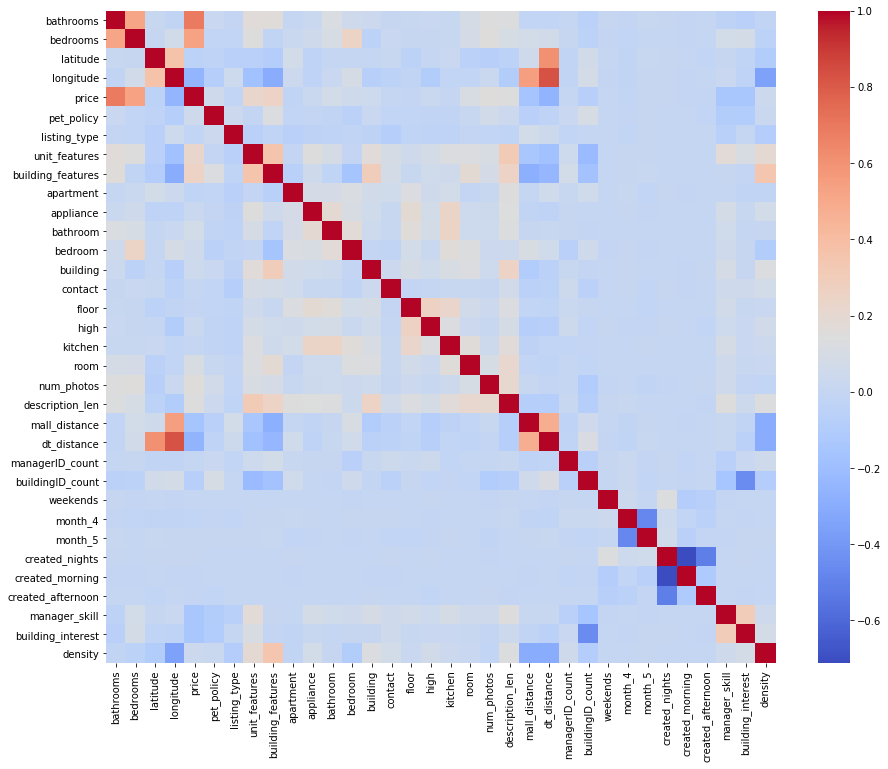

In [132]:
# plt.figure(figsize=(15,12))
# sns.heatmap(g.corr(), cmap='coolwarm');

In [145]:
dvals

{'-74.006_40.708': 345,
 '-74.007_40.707': 300,
 '-73.998_40.757': 290,
 '-74.015_40.708': 266,
 '-73.999_40.761': 252,
 '-73.976_40.746': 201,
 '-74.005_40.707': 201,
 '-74.016_40.706': 188,
 '-73.985_40.764': 179,
 '-73.973_40.744': 168,
 '-73.958_40.82': 165,
 '-74.005_40.733': 163,
 '-73.996_40.753': 161,
 '-73.996_40.759': 159,
 '-73.998_40.761': 156,
 '-73.99_40.76': 156,
 '-73.974_40.745': 154,
 '-73.978_40.747': 154,
 '-74.008_40.705': 148,
 '-73.992_40.768': 147,
 '-73.974_40.754': 146,
 '-73.968_40.754': 144,
 '-73.984_40.759': 142,
 '-73.951_40.772': 139,
 '-73.986_40.73': 135,
 '-73.952_40.778': 134,
 '-74.01_40.706': 130,
 '-73.948_40.78': 130,
 '-74.006_40.711': 129,
 '-73.97_40.753': 129,
 '-73.986_40.735': 129,
 '-73.988_40.749': 128,
 '-73.978_40.741': 125,
 '-73.977_40.741': 125,
 '-74.0_40.761': 125,
 '-73.965_40.757': 125,
 '-73.983_40.73': 123,
 '-73.984_40.764': 122,
 '-73.976_40.749': 121,
 '-73.974_40.796': 116,
 '-73.95_40.784': 113,
 '-73.99_40.734': 112,
 '-7

In [151]:
dvals.get('73.998_40.737', vals.min())

1

In [152]:
m = new_train_df['manager_id'].value_counts()

In [153]:
m

e6472c7237327dd3903b3d6f6a94515a    2471
6e5c10246156ae5bdcd9b487ca99d96a     706
8f5a9c893f6d602f4953fcc0b8e6e9b4     407
62b685cc0d876c3a1a51d63a0d6a8082     399
cb87dadbca78fad02b388dc9e8f25a5b     370
                                    ... 
9e7e416389fe87a63a735f40cfdcb0d8       1
c7f8e6f524742b272ee26ae0acf04924       1
9c1492df173d774377debcab1bbfc132       1
07ede1747542adc287e63e8ad777d36f       1
e4b9ddbf19db2ca58788561cb3a8fd41       1
Name: manager_id, Length: 3423, dtype: int64

In [155]:
# new_train_df["density"] = new_train_df['pos'].apply(lambda x: dvals.get(x, vals.min()))
g.shape

(48329, 34)